In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"    

In [1]:
import importlib
import modules

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt


Transient length: no transient found


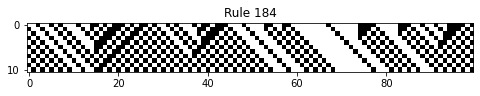

In [2]:
ca_184 = CA()

p = 0.5
L = 100
initial_state = ca_184.gen_initial_state_bernoulli(L, p)
lambda_parameter, evolution = ca_184.gen_CA(L, r=1, k=2, dec_rule=184, t_end=10, s_q='0')
transient_length = ca_184.calculate_transient_length()

plt.figure(figsize=(8,10))
plt.title(f'Rule 184')
plt.imshow(evolution, cmap='binary')

print(f"Transient length: {transient_length}")


In [4]:
import cellpylib as cpl
import numpy as np

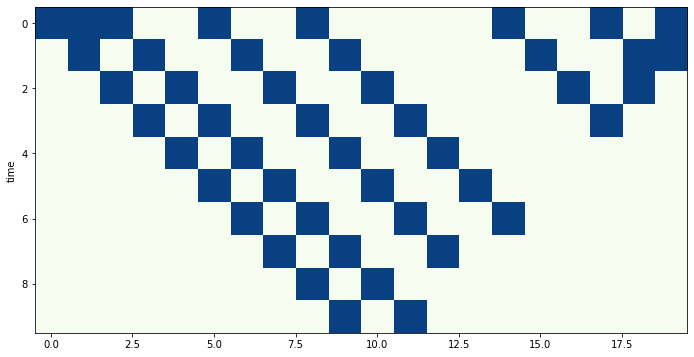

In [5]:
importlib.reload(modules)
from modules import triangulize_evolution

p = 0.5
L = 20
T = int(L / 2)
initial_state = ca_184.gen_initial_state_bernoulli(L, p)

# print(cellular_automaton)
cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
cellular_automaton = triangulize_evolution(cellular_automaton)

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(cellular_automaton, colormap='GnBu')



In [6]:
importlib.reload(modules)
from modules import find_jams

jams = find_jams(cellular_automaton)
print(f"The jams in the evolution above are: {jams}")
print(f"\'[[i, j], size]\' with i and j being the row coordinates in the row that the jam was last found in and size being the size of the jam.")
jam_sizes = [jam[1] for jam in jams]
print(f"Jam sizes: {jam_sizes}")

The jams in the evolution above are: [[[0, 2], 3]]
'[[i, j], size]' with i and j being the row coordinates in the row that the jam was last found in and size being the size of the jam.
Jam sizes: [3]


[1, 2, 1, 2, 3, 4, 5, 6, 5, 4]


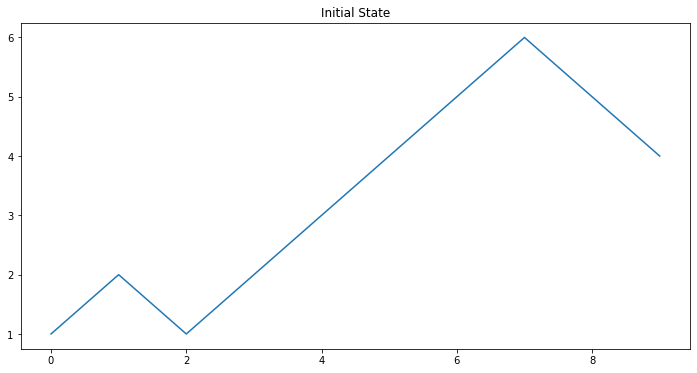

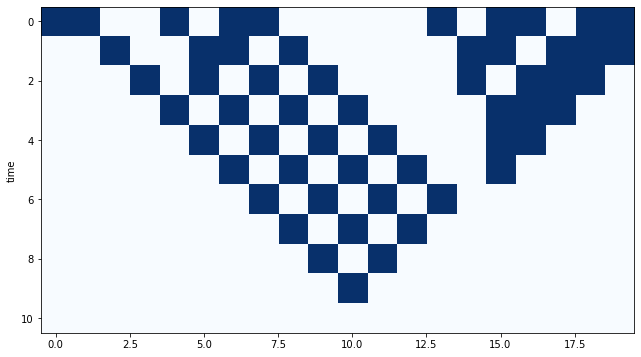

In [7]:
importlib.reload(modules)
from modules import triangulize_evolution
from modules import initial_to_random_walk

# Plot the random walk that is the initial state, go up for 1, down for 0
initial_state = np.array([[1, 1, 0, 1, 1, 1, 1, 1, 0, 0]])
random_walk = initial_to_random_walk(initial_state)
print(random_walk)
plt.figure(figsize=(12,6))
plt.title(f'Initial State')
plt.plot(random_walk)

_, cellular_automaton = ca_184.gen_CA(L, r=1, k=2, dec_rule=184, t_end=10, s_q='0')
# cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
cellular_automaton = triangulize_evolution(cellular_automaton)

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(cellular_automaton, colormap='Blues')





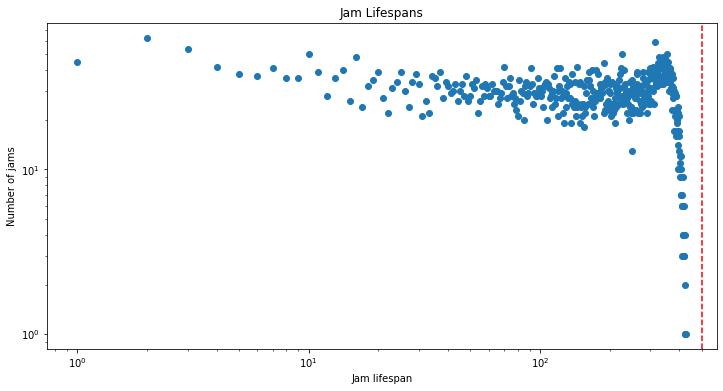

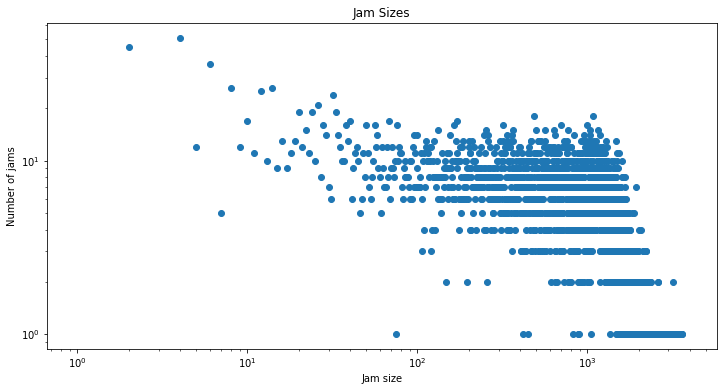

[(2, 45), (4, 51), (5, 12), (6, 36), (7, 5), (8, 26), (9, 12), (10, 17), (11, 11), (12, 25), (13, 10), (14, 26), (15, 9), (16, 13), (17, 9), (18, 11), (19, 13), (20, 19), (21, 12), (22, 15), (23, 11), (24, 19), (25, 10), (26, 21), (27, 8), (28, 16), (29, 14), (30, 7), (31, 6), (32, 24), (33, 19), (34, 14), (35, 12), (36, 10), (37, 10), (38, 16), (39, 13), (40, 17), (41, 6), (42, 9), (43, 11), (44, 12), (45, 10), (46, 5), (47, 6), (48, 11), (49, 8), (50, 16), (51, 11), (52, 7), (53, 6), (54, 8), (55, 10), (56, 16), (57, 12), (58, 14), (59, 9), (60, 8), (61, 5), (62, 12), (63, 9), (64, 7), (65, 7), (66, 12), (67, 8), (68, 17), (69, 6), (70, 9), (71, 12), (72, 9), (73, 8), (74, 10), (75, 1), (76, 16), (77, 10), (78, 12), (79, 11), (80, 11), (81, 7), (82, 6), (83, 9), (84, 8), (85, 10), (86, 8), (87, 8), (88, 8), (89, 7), (90, 10), (91, 6), (92, 10), (93, 6), (94, 12), (95, 7), (96, 14), (97, 11), (98, 7), (99, 9), (100, 14), (101, 7), (102, 7), (103, 7), (104, 8), (105, 11), (106, 6), (10

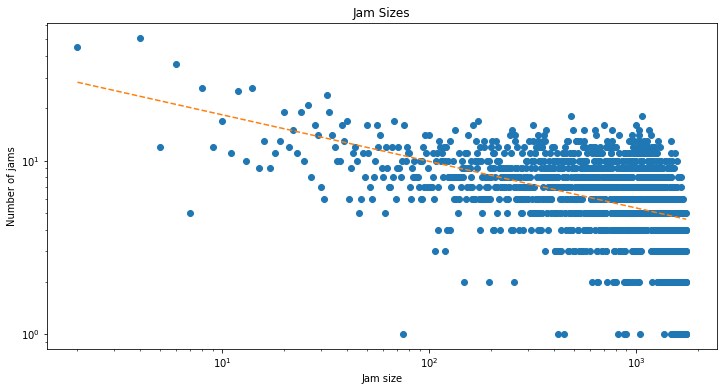

In [8]:
import scipy.optimize as opt
importlib.reload(modules)
from modules import run_model
from modules import run_model_stochastic

p = 0.5
L = 1000
T = int(L / 2)
n = 100

lifespan_counter, jam_size_counter = run_model_stochastic(p, L, T, n)

plt.figure(figsize=(12,6))
plt.title(f'Jam Lifespans')
plt.loglog(range(1, int(max(lifespan_counter.keys()))), [lifespan_counter[i] for i in range(1, int(max(lifespan_counter.keys())))], 'o')
plt.xlabel('Jam lifespan')
plt.ylabel('Number of jams')

# Add a vertical line at T
plt.axvline(x=T, color='red', linestyle='--')
plt.show()

plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes')
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.show()

# Try various fitting methods
def power_law_cutoff_func(x, a, b):
    return x** -a * np.exp(-b * x) 

jam_size_counter = sorted(jam_size_counter.items())

print(jam_size_counter)

x = np.array([i[0] for i in jam_size_counter])
y = np.array([i[1] for i in jam_size_counter])

def linear_func(x, a, b):
    return a * x + b

log_x, log_y = np.log(x), np.log(y)

# Take only 80% of the data to fit the line
x = x[:int(len(x) * 0.8)]
y = y[:int(len(y) * 0.8)]
log_x = log_x[:int(len(log_x) * 0.8)]
log_y = log_y[:int(len(log_y) * 0.8)]

# Fit a line to the log-log plot
popt, pcov = opt.curve_fit(linear_func, log_x, log_y)

# Plot the log-log plot
plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes')
plt.loglog(x, y, 'o')
plt.loglog(x, np.exp(linear_func(log_x, *popt)), '--')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.show()



In [9]:
# importlib.reload(modules)
# from modules import run_model_for_densities

# p_values = np.linspace(0.4, 0.6, 50) 
# p_repetitions = 10
# L = 1000
# T = int(L / 2)
# n = 20

# output = run_model_for_densities(p_values, L, T, p_repetitions, n, concurrently=True)
# print(output)

# # save the output to a csv file
# import pandas as pd
# df = pd.DataFrame(output)
# df.to_csv('output.csv', index=False)
imp

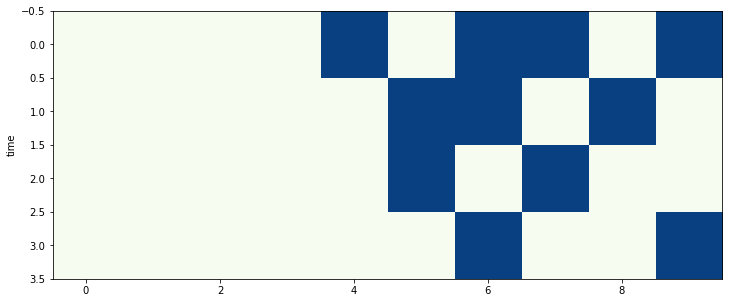

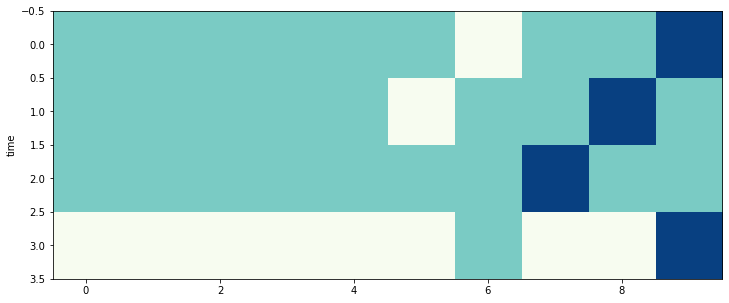

Flow: 10
Delay: 17


In [11]:
importlib.reload(modules)
from modules import run_model_stochastic
from modules import calculate_flow_nasch
from modules import calculate_delay_nasch

p = 0.4
L = 10
T = int(L / 2)
T = 3
n = 1
v_max=3 

lifespan_counter, jam_size_counter, evolutions = run_model_stochastic(p, L, T, n, v_max=3, p_slowdown = 0, return_evolutions=True)

# plt.figure(figsize=(12,6))
# plt.title(f'Jam Lifespans')
# plt.loglog(range(1, int(max(lifespan_counter.keys()))), [lifespan_counter[i] for i in range(1, int(max(lifespan_counter.keys())))], 'o')
# plt.xlabel('Jam lifespan')
# plt.ylabel('Number of jams')

# # Add a vertical line at T
# plt.axvline(x=T, color='red', linestyle='--')
# plt.show()

# plt.figure(figsize=(12,6))
# plt.title(f'Jam Sizes')
# plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o')
# plt.xlabel('Jam size')
# plt.ylabel('Number of jams')
# plt.show()

evolution = evolutions[0]
    
location_evolution = [[x[0] for x in line] for line in evolution]
speed_evolution = [[x[1] for x in line] for line in evolution]

flow = calculate_flow_nasch(evolution)
delay = calculate_delay_nasch(evolution,v_max) 

# plot the car evolution
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(location_evolution, colormap='GnBu')

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(speed_evolution, colormap='GnBu')

print(f"Flow: {flow}")
print(f"Delay: {delay}") 



Critical density: 0.4081632653061224


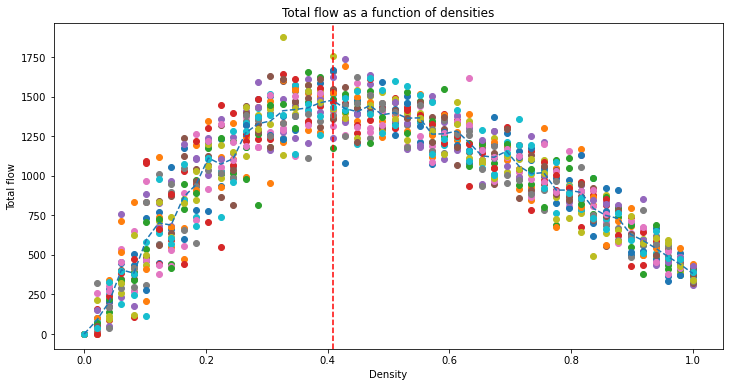

In [15]:
importlib.reload(modules)
from modules import run_model_stochastic
from modules import calculate_flow_nasch

p = np.linspace(0.0, 1, 50)
L = 100
T = int(L / 2)
n = 20
p_slowdown = 0.3
v_max = 3

total_flows_per_density = dict()
average_flows_per_density = dict()

for density in p:
    lifespan_counter, jam_size_counter, evolutions = run_model_stochastic(density, L, T, n, v_max=v_max, p_slowdown = p_slowdown, return_evolutions=True)
    

    total_flows = [calculate_flow_nasch(evolution) for evolution in evolutions]
    average_flows = [flow / float(T) for flow in total_flows]
    
    total_flows_per_density[density] = total_flows
    average_flows_per_density[density] = average_flows

# Find critical point: the density for which the total flow average is maximum
mean_total_flow_per_density = {density: np.mean(flows) for density, flows in total_flows_per_density.items()}
critical_density = max(mean_total_flow_per_density, key=mean_total_flow_per_density.get)
print(f"Critical density: {critical_density}")

# plot total flow as a function of densities
plt.figure(figsize=(12,6))
plt.title(f'Total flow as a function of densities')
plt.plot(total_flows_per_density.keys(), total_flows_per_density.values(), 'o')
plt.plot(total_flows_per_density.keys(), [np.mean(flows) for flows in total_flows_per_density.values()], '--')

# Add a vertical line at the critical density
plt.axvline(x=critical_density, color='red', linestyle='--')

plt.xlabel('Density')
plt.ylabel('Total flow')
plt.show()





based on the v=3, pslow=0.3; check the critical density at 0.4 and its critical jamsize distribution

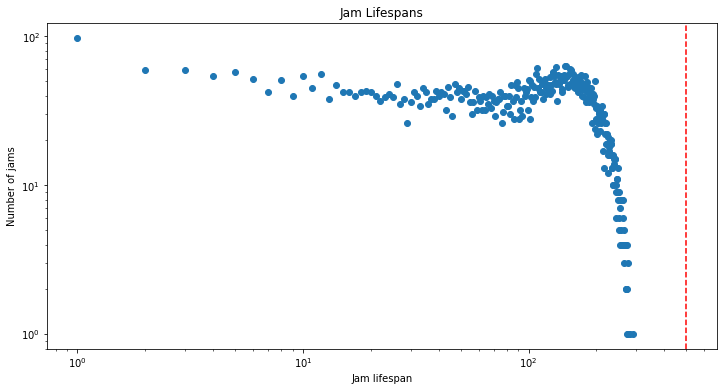

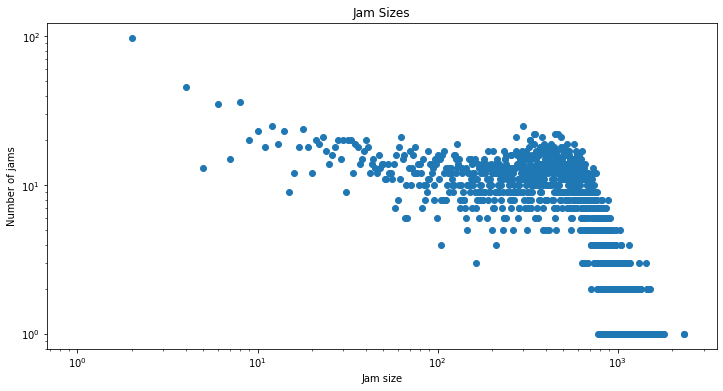

[(2, 98), (4, 46), (5, 13), (6, 35), (7, 15), (8, 36), (9, 20), (10, 23), (11, 18), (12, 25), (13, 19), (14, 23), (15, 9), (16, 12), (17, 18), (18, 24), (19, 18), (20, 12), (21, 20), (22, 19), (23, 21), (24, 17), (25, 14), (26, 16), (27, 18), (28, 20), (29, 15), (30, 20), (31, 9), (32, 20), (33, 20), (34, 12), (35, 19), (36, 18), (37, 14), (38, 15), (39, 17), (40, 20), (41, 18), (42, 12), (43, 14), (44, 15), (45, 13), (46, 12), (47, 16), (48, 13), (49, 14), (50, 14), (51, 11), (52, 11), (53, 14), (54, 12), (55, 12), (56, 11), (57, 14), (58, 7), (59, 16), (60, 8), (61, 18), (62, 11), (63, 21), (64, 15), (65, 16), (66, 6), (67, 10), (68, 6), (69, 13), (70, 17), (71, 10), (72, 13), (73, 16), (74, 12), (75, 18), (76, 12), (77, 12), (78, 14), (79, 10), (80, 14), (81, 12), (82, 7), (83, 15), (84, 10), (85, 8), (86, 10), (87, 9), (88, 17), (89, 11), (90, 11), (91, 14), (92, 14), (93, 12), (94, 13), (95, 10), (96, 8), (97, 15), (98, 14), (99, 6), (100, 16), (101, 15), (102, 11), (103, 15), (10

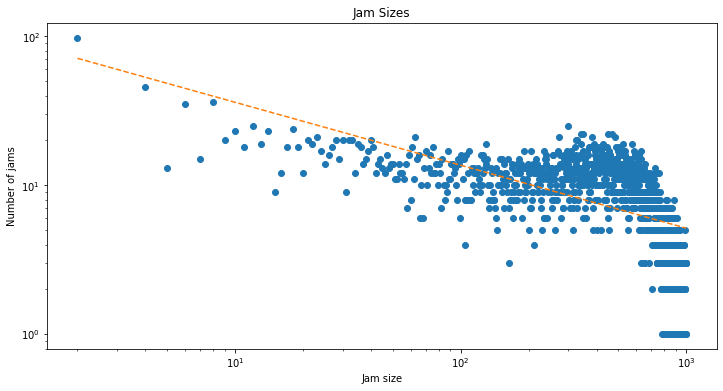

In [17]:
import scipy.optimize as opt
importlib.reload(modules)
from modules import run_model
from modules import run_model_stochastic

p = 0.408 
L = 1000
T = int(L / 2)
n = 100

lifespan_counter, jam_size_counter = run_model_stochastic(p, L, T, n,v_max=3, p_slowdown=0.3) 

plt.figure(figsize=(12,6))
plt.title(f'Jam Lifespans')
plt.loglog(range(1, int(max(lifespan_counter.keys()))), [lifespan_counter[i] for i in range(1, int(max(lifespan_counter.keys())))], 'o')
plt.xlabel('Jam lifespan')
plt.ylabel('Number of jams')

# Add a vertical line at T
plt.axvline(x=T, color='red', linestyle='--')
plt.show()

plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes')
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.show()

# Try various fitting methods
def power_law_cutoff_func(x, a, b):
    return x** -a * np.exp(-b * x) 

jam_size_counter = sorted(jam_size_counter.items())

print(jam_size_counter)

x = np.array([i[0] for i in jam_size_counter])
y = np.array([i[1] for i in jam_size_counter])

def linear_func(x, a, b):
    return a * x + b

log_x, log_y = np.log(x), np.log(y)

# Take only 80% of the data to fit the line
x = x[:int(len(x) * 0.8)]
y = y[:int(len(y) * 0.8)]
log_x = log_x[:int(len(log_x) * 0.8)]
log_y = log_y[:int(len(log_y) * 0.8)]

# Fit a line to the log-log plot
popt, pcov = opt.curve_fit(linear_func, log_x, log_y) 

# Plot the log-log plot
plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes')
plt.loglog(x, y, 'o')
plt.loglog(x, np.exp(linear_func(log_x, *popt)), '--')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.show()



Text(0.5, 0, 'k')

Text(0, 0.5, 'P(k)')

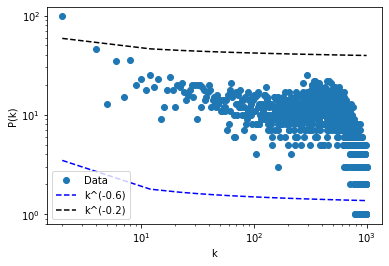

In [48]:



data_x = x  # 替换为你的数据点x值
data_y = y  # 替换为你的数据点y值

min_slope = 0.6  # 最小斜率
max_slope = 0.2 # 最大斜率 

# 选择一个x轴的范围来绘制这两条线
line_x = np.linspace(min(data_x), max(data_x), 100)

line_y_min = np.exp(np.log(line_x) ** (-min_slope)) 
line_y_max = np.exp(np.log(line_x) ** (-max_slope)+3)   

#plot loglog 
plt.loglog(data_x, data_y, 'o', label='Data')  # 
plt.loglog(line_x, line_y_min, 'b--', label=f'k^(-{min_slope})')  # 绘制最小斜率的线
plt.loglog(line_x, line_y_max, 'k--', label=f'k^(-{max_slope})')  # 绘制最大斜率的线

plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.show()

In [34]:
popt 

array([-0.42274389,  4.55878774])

Text(0.5, 1.0, 'Probability Density Function')

Text(0.5, 0, 'Total delay experience')

Text(0, 0.5, 'Density')

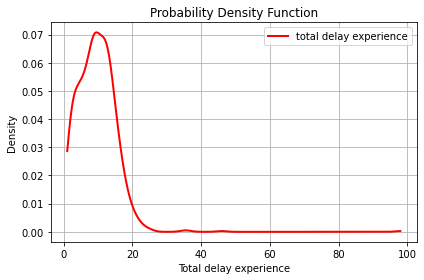

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

data = y  
density = gaussian_kde(data)
xs = np.linspace(min(data), max(data), 1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs, density(xs),color='red', linestyle='-', linewidth=2,label='total delay experience')
plt.title('Probability Density Function')
plt.xlabel('Total delay experience')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout() 
plt.show()

In [22]:
x
y 

array([  2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

array([98, 46, 13, 35, 15, 36, 20, 23, 18, 25, 19, 23,  9, 12, 18, 24, 18,
       12, 20, 19, 21, 17, 14, 16, 18, 20, 15, 20,  9, 20, 20, 12, 19, 18,
       14, 15, 17, 20, 18, 12, 14, 15, 13, 12, 16, 13, 14, 14, 11, 11, 14,
       12, 12, 11, 14,  7, 16,  8, 18, 11, 21, 15, 16,  6, 10,  6, 13, 17,
       10, 13, 16, 12, 18, 12, 12, 14, 10, 14, 12,  7, 15, 10,  8, 10,  9,
       17, 11, 11, 14, 14, 12, 13, 10,  8, 15, 14,  6, 16, 15, 11, 15,  4,
        8, 16,  8, 12, 17,  8,  8, 13, 10, 12, 13,  9, 12, 12, 13, 11, 10,
        9, 16, 10, 16, 12, 15, 13, 19, 14, 15, 10,  8,  7, 10, 13, 12,  8,
        9,  8,  8,  7, 13,  6,  5, 10, 12, 10, 12, 15, 10,  9, 15, 11,  7,
       14, 12, 10, 12, 11,  9, 15,  3,  7,  8, 11,  9, 14, 13,  6,  8, 10,
        9, 12, 10,  8, 14,  8,  9, 12, 13, 15,  9, 12, 14, 13,  6, 11, 13,
       17,  8,  9, 10, 13,  9, 11, 10, 14, 10, 12,  5, 12,  7, 17,  7,  8,
       13,  9, 14,  9, 12,  4, 13, 12, 15, 12, 10, 14,  9,  9, 10, 11, 12,
       13, 10,  8,  7, 12

Critical density: 1.0


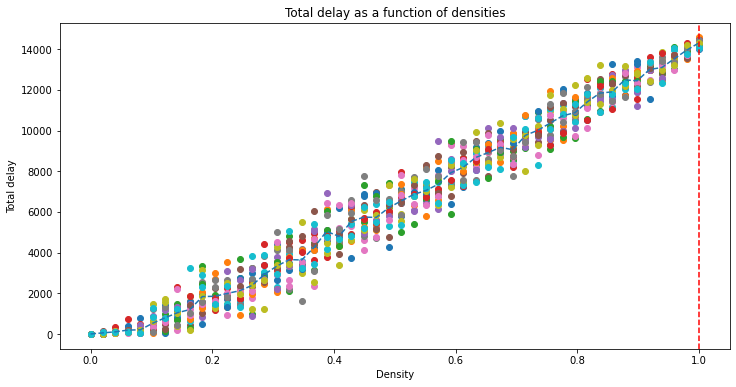

In [14]:
importlib.reload(modules)
from modules import run_model_stochastic
from modules import calculate_flow_nasch

p = np.linspace(0.0, 1, 50)
L = 100
T = int(L / 2)
n = 20
p_slowdown = 0.8
v_max = 3

total_delays_per_density = dict() 
average_delays_per_density = dict()  

for density in p:
    lifespan_counter, jam_size_counter, evolutions = run_model_stochastic(density, L, T, n, v_max=v_max, p_slowdown = p_slowdown, return_evolutions=True)
    

    total_delays = [calculate_delay_nasch(evolution,v_max) for evolution in evolutions] 
    average_delays = [delay / float(T) for delay in total_delays]   
    
    total_delays_per_density[density] = total_delays  # n个evolution下的total delay 
    average_delays_per_density[density] = average_delays

# Find critical point: the density for which the total flow average is maximum
mean_total_delays_per_density = {density: np.mean(delays) for density, delays in total_delays_per_density.items()} 
critical_density = max(mean_total_delays_per_density, key=mean_total_delays_per_density.get)  
print(f"Critical density: {critical_density}")

# plot total flow as a function of densities
plt.figure(figsize=(12,6))
plt.title(f'Total delay as a function of densities')
plt.plot(total_delays_per_density.keys(), total_delays_per_density.values(), 'o') 
plt.plot(total_delays_per_density.keys(), [np.mean(delays) for delays in total_delays_per_density.values()], '--') 

# Add a vertical line at the critical density
plt.axvline(x=critical_density, color='red', linestyle='--')

plt.xlabel('Density')
plt.ylabel('Total delay')
plt.show()


Finding critical densities, 5 v_max values and 20 p_slowdown values: 100%|███████████| 100/100 [00:12<00:00,  7.91it/s]


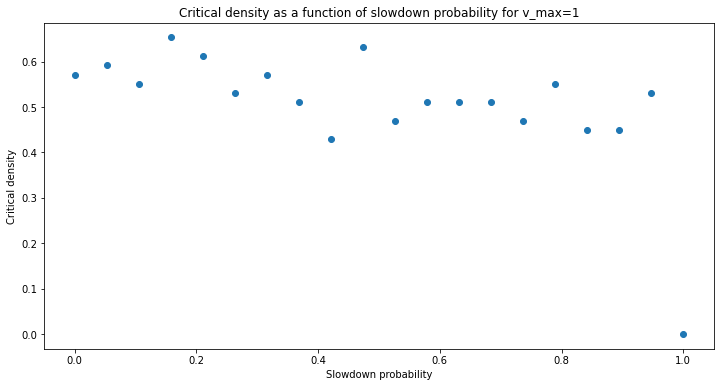

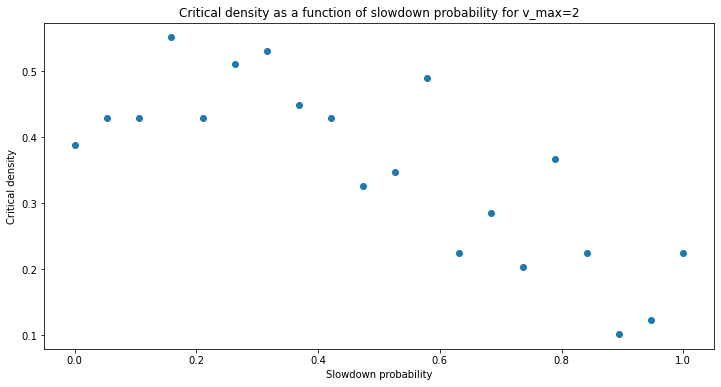

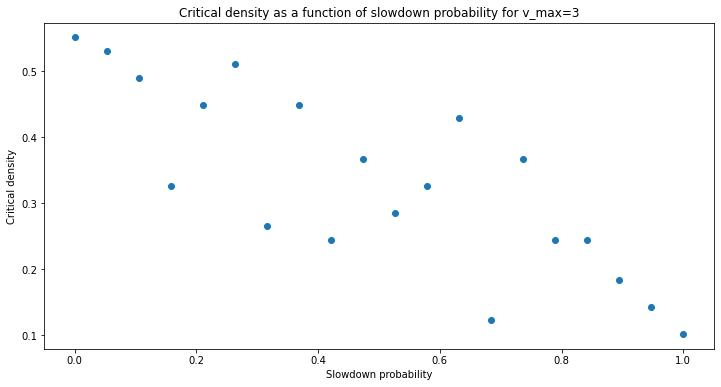

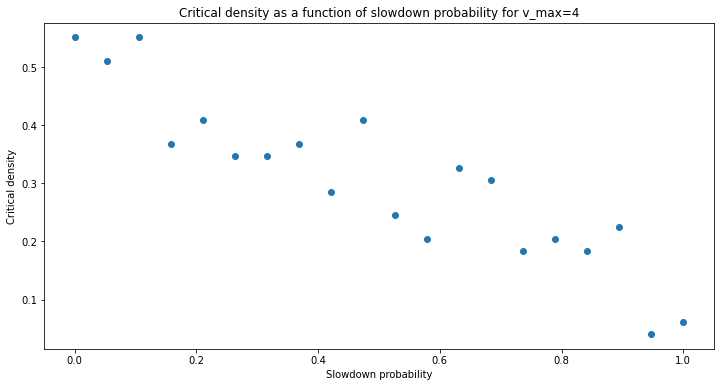

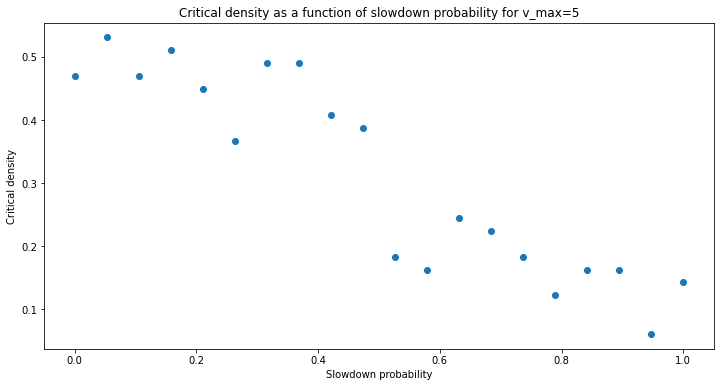

In [16]:
import pandas as pd
importlib.reload(modules)
from modules import find_critical_dataframe_nasch

p_values = np.linspace(0.0, 1, 50)
L = 100
T = int(L / 2)
n = 1
p_slowdown_values = np.linspace(0.0, 1, 20)
v_max_values = [1, 2, 3, 4, 5]

output_df = find_critical_dataframe_nasch(p_slowdown_values, v_max_values, p_values, L, T, n)

# Save the output to a csv file
output_df.to_csv(f'critical_densities_nasch.csv', index=False)

# Plot the output per v_max
for v_max in v_max_values:
    df = output_df[output_df[f'v_max'] == v_max]
    plt.figure(figsize=(12,6))
    plt.title(f'Critical density as a function of slowdown probability for v_max={v_max}')
    plt.plot(df['p_slowdown'], df['critical_density'], 'o')
    plt.xlabel('Slowdown probability')
    plt.ylabel('Critical density')
    plt.show()

In [19]:
print(output_df)
v_max = 1
df_filtered = output_df[output_df['v_max'] == v_max]
print(df_filtered)

    p_slowdown  v_max  critical_density
0     0.000000      1          0.612245
1     0.052632      1          0.612245
2     0.105263      1          0.612245
3     0.157895      1          0.530612
4     0.210526      1          0.571429
..         ...    ...               ...
95    0.789474      5          0.224490
96    0.842105      5          0.102041
97    0.894737      5          0.163265
98    0.947368      5          0.142857
99    1.000000      5          0.204082

[100 rows x 3 columns]
    p_slowdown  v_max  critical_density
0     0.000000      1          0.612245
1     0.052632      1          0.612245
2     0.105263      1          0.612245
3     0.157895      1          0.530612
4     0.210526      1          0.571429
5     0.263158      1          0.571429
6     0.315789      1          0.530612
7     0.368421      1          0.510204
8     0.421053      1          0.530612
9     0.473684      1          0.612245
10    0.526316      1          0.551020
11    0.578947  